## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [64]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [103]:
# your code here
url="https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv"
data=pd.read_csv(url)
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [66]:
data.tail(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [67]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [68]:
data.isnull().values.any()
# количественные - duration amount age 
# бинарные - telephone foreign_worker credit_risk
# порядковые - savings employment_duration installment_rate number_credits 
# категориальные - credit_history purpose personal_status_sex other_debtors property 
#                 other_installment_plans housing job

False

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [69]:
data.groupby('purpose')['amount'].apply(lambda x: x.mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [70]:
(len(data[(data.age < 30) & (data.housing == 'rent')])/len(data[data.age < 30])*100)

66.66666666666666

In [71]:
(len(data[(data.age > 40) & (data.housing == 'rent')])/len(data))*100

18.5

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [72]:
data[(data.foreign_worker == 'yes') & ((data.number_credits == '4-5') | (data.number_credits == '>=6'))]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
213,0<= ... < 200 DM,6,all credits at this bank paid back duly,others,1299,unknown/no savings account,1 <= ... < 4 yrs,>= 35,male : married/widowed,none,...,unknown / no property,74,none,rent,4-5,unemployed/unskilled - non-resident,3 or more,no,yes,good


### Задание 6 (1 балл)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [74]:
# мой код ниже

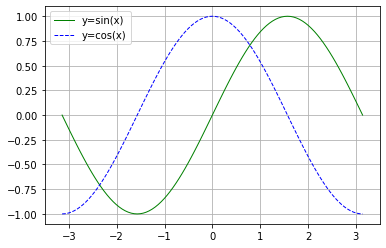

In [75]:
x = np.linspace(-np.pi, np.pi, 101)
y = np.sin(x)
z = np.cos(x)

plt.plot(x, y, color='green',  linewidth=1)
plt.plot(x, z, color='blue', linestyle='dashed', linewidth=1)
plt.xticks(np.linspace(-7, 7, 15))
plt.yticks(np.linspace(-1, 1, 9))
plt.legend(['y=sin(x)', 'y=cos(x)'])
plt.grid()
plt.axis([-3.5, 3.5, -1.1, 1.1]) 
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

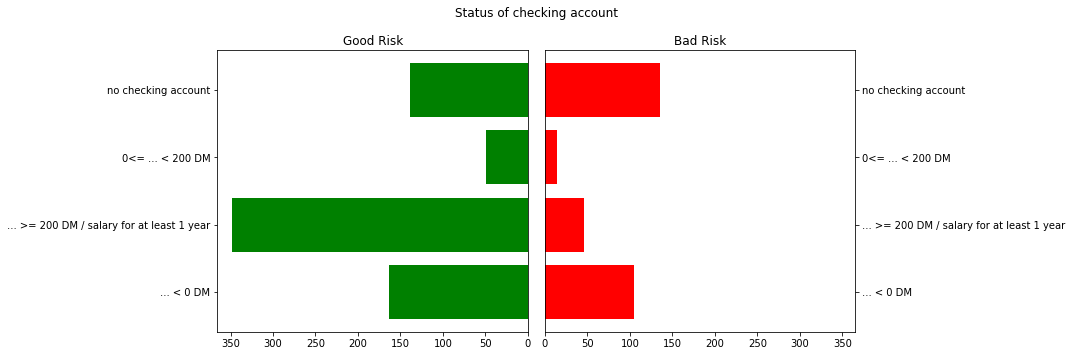

In [9]:
# мой код ниже

Text(0.5, 1.0, 'Bad Risk')

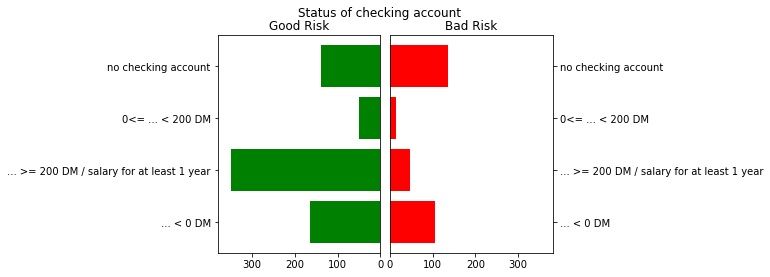

In [76]:
fig, (good_ax, bad_ax) = plt.subplots(1, 2)
fig.suptitle('Status of checking account')

good_ax = plt.subplot2grid((1, 6), (0, 0), colspan=3)
bad_ax = plt.subplot2grid((1, 6), (0, 3), colspan=3)

good_ax.barh(sorted(data[data.credit_risk == 'good'].status.value_counts().index.to_list()), 
             data[data.credit_risk == 'good'].status.value_counts()
             [
                 sorted(data[data.credit_risk == 'good'].status.value_counts().index.to_list())
             ],
             color = 'green')

bad_ax.barh(sorted(data[data.credit_risk == 'bad'].status.value_counts().index.to_list()), 
            data[data.credit_risk == 'bad'].status.value_counts()
            [
                sorted(data[data.credit_risk == 'bad'].status.value_counts().index.to_list())
            ],
             color = 'red')

good_ax.set_xlim(380, 0)
good_ax.set_title('Good Risk')


bad_ax.set_xlim(0, 380)
bad_ax.yaxis.tick_right()
bad_ax.set_title('Bad Risk')

### Задание 8  (0.5 балла)

In [78]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

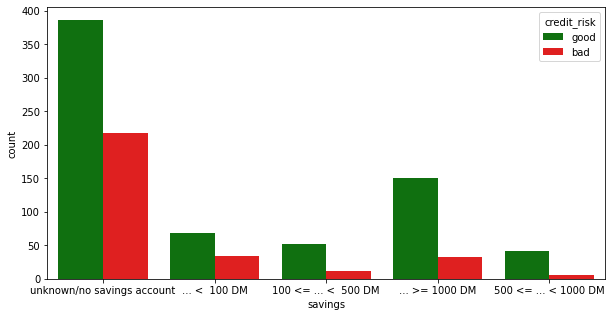

In [11]:
# your code here

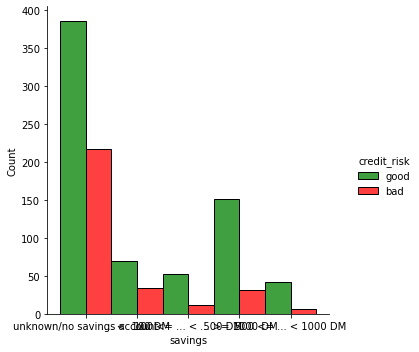

In [122]:
sns.displot(data, x='savings', hue=data.credit_risk, palette = ['green', 'red'], multiple='dodge')

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

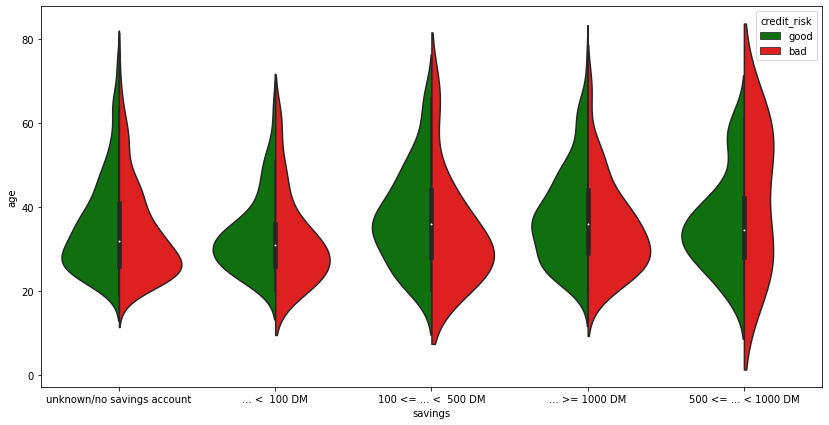

In [12]:
# your code here

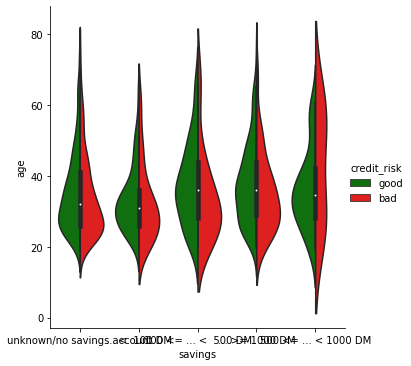

In [79]:
sns.catplot(x='savings', y='age', hue='credit_risk',
            kind="violin", split=True,
            palette=['green', 'red'], data=data)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

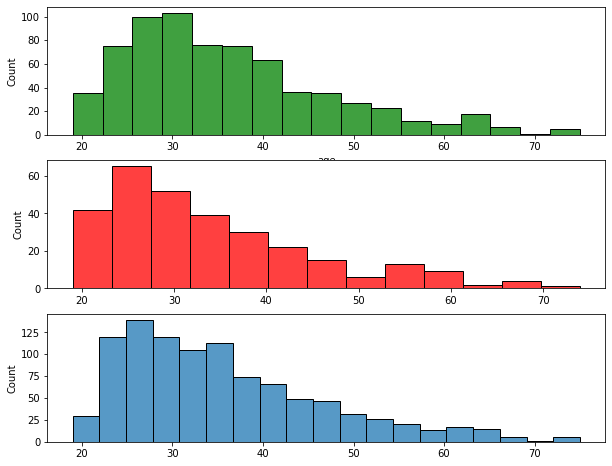

In [212]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,8))

sns.histplot(data=data[data.credit_risk == 'good'], x='age', shrink=1.0, color = ['green'], ax=ax1)

sns.histplot(data=data[data.credit_risk == 'bad'], x='age', shrink=1.0, color = ['red'], ax=ax2)

ax2.set_xlabel("")

sns.histplot(data=data, x='age', shrink=1.0, palette = ['green'], ax=ax3)

ax3.set_xlabel("")

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

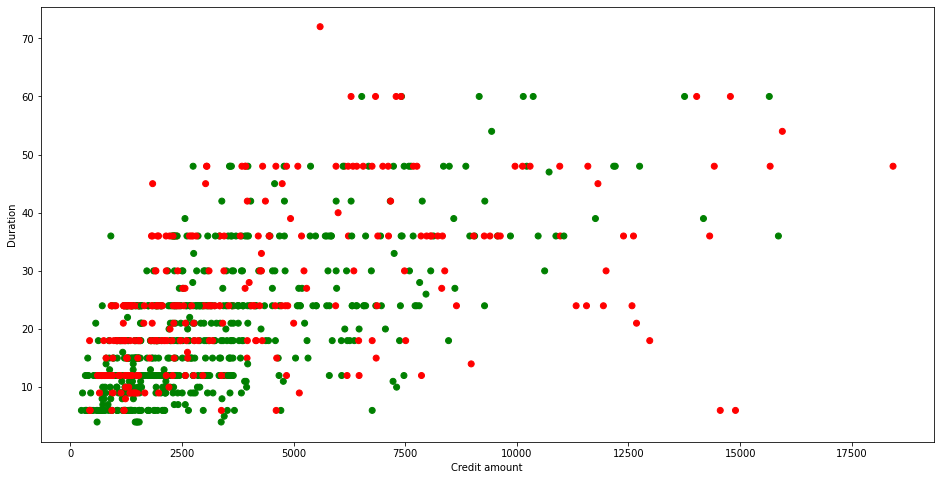

In [21]:
# мой код ниже

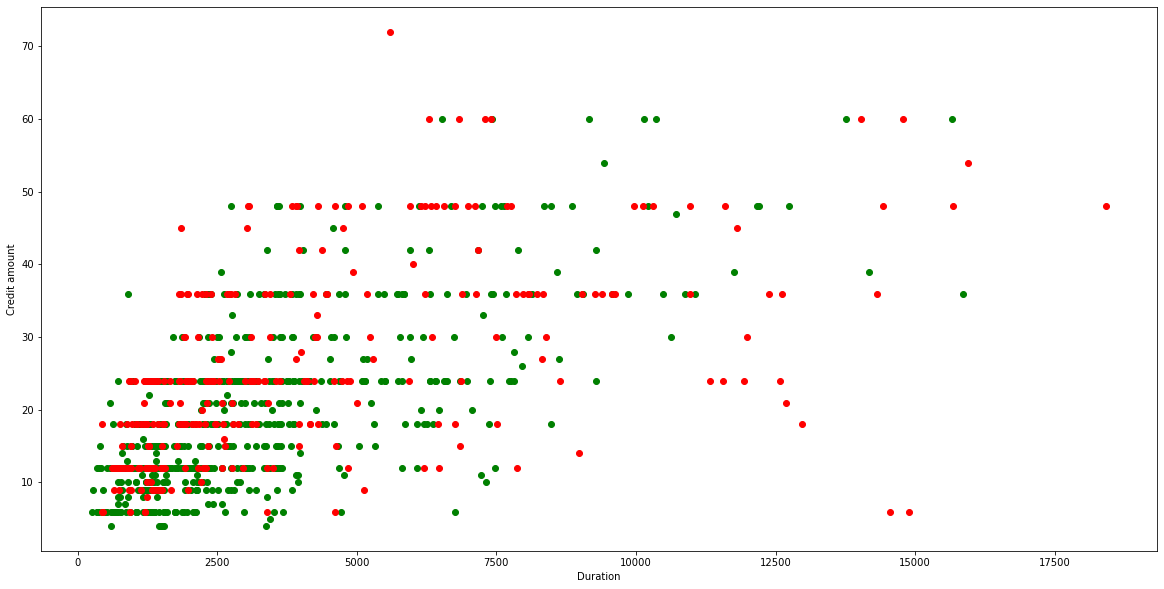

In [80]:
plt.figure(figsize=(20,10))
plt.scatter(x=data[data.credit_risk == 'good'].amount, y=data[data.credit_risk == 'good'].duration, color = 'green')
plt.scatter(x=data[data.credit_risk == 'bad'].amount, y=data[data.credit_risk == 'bad'].duration, color = 'red')
plt.xlabel('Duration')
plt.ylabel('Credit amount')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

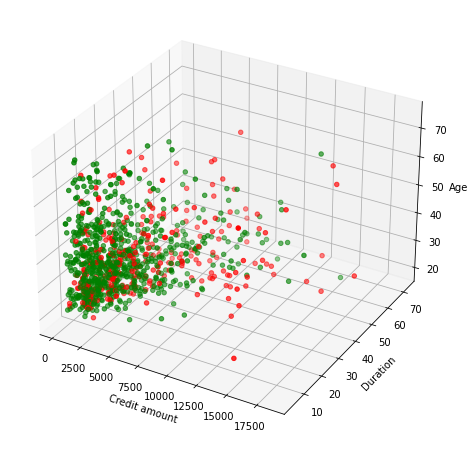

In [15]:
# мой код ниже
# https://stackoverflow.com/questions/51105220/plotting-a-pandas-df-to-a-3d-line-graph-with-changing-width

Text(0.5, 0, 'Age')

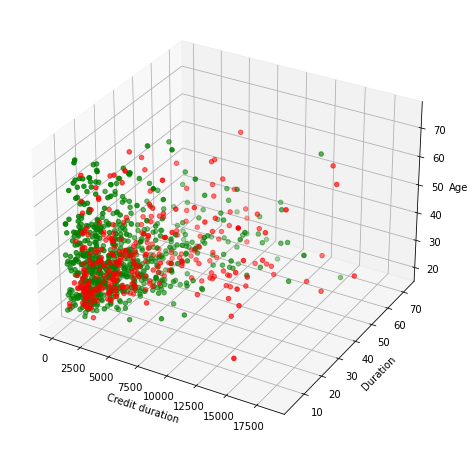

In [81]:
grh = plt.figure(figsize=(15,8)).gca(projection='3d')
grh.scatter(data[data.credit_risk == 'good'].amount, data[data.credit_risk == 'good'].duration, data[data.credit_risk == 'good'].age, color = 'green')
grh.scatter(data[data.credit_risk == 'bad'].amount, data[data.credit_risk == 'bad'].duration, data[data.credit_risk == 'bad'].age, color = 'red')
grh.set_xlabel('Credit duration')
grh.set_ylabel('Duration')
grh.set_zlabel('Age')

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [139]:
# скопировал data в переменную df для того, чтобы вернуться к предыдущим заданиям 
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df = data.copy()

df_upd = df.select_dtypes(exclude=["number"])
df.drop(df.select_dtypes(exclude=["number"]).columns.values, axis=1, inplace=True)


# бинарные и порядковые
df_bin_por = df_upd[['credit_history', 'personal_status_sex', 'present_residence', 'people_liable', 'status', 
                     'telephone', 'foreign_worker', 'credit_risk', 'savings', 'employment_duration', 
                     'installment_rate', 'number_credits', 'people_liable']]
df_bin_por = df_bin_por.apply(LabelEncoder().fit_transform)

#категориальные
df_cat = data.drop(df_bin_por, axis=1).drop(df, axis=1)
df_cat = pd.get_dummies(df_cat, drop_first=True)

df = pd.concat([df, df_bin_por, df_cat], axis=1)
df

,duration,amount,age,credit_history,personal_status_sex,present_residence,people_liable,status,telephone,foreign_worker,...,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident
0,18,1049,21,0,0,3,0,3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,9,2799,36,0,3,0,1,3,0,0,...,0,0,1,1,0,0,0,1,0,0
2,12,841,23,4,0,3,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,12,2122,39,0,3,0,1,3,0,1,...,0,0,1,1,0,0,0,0,0,1
4,12,2171,38,0,3,3,0,3,0,1,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,4,3,3,1,3,0,0,...,0,0,1,1,0,0,0,0,0,1
996,24,2303,45,4,3,2,0,3,0,0,...,0,0,1,1,0,0,1,1,0,0
997,21,12680,30,0,3,3,0,1,1,0,...,0,1,0,1,0,1,0,0,0,0
998,12,6468,52,4,3,2,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [221]:
def predict(Xtest: np.array) -> np.array:
    a += 
    return 0

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('credit_risk', 1).values
y = df['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# accuracy_score(y_test, predict(X_test))

In [224]:
X_test[X_test < 0]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [218]:
X_test

array([[-1, -1, -1, ...,  0,  0, -1],
       [-1, -1, -1, ...,  0,  0, -1],
       [-1, -1, -1, ...,  0,  0, -1],
       ...,
       [-1, -1, -1, ..., -1,  0,  0],
       [-1, -1, -1, ...,  0,  0,  0],
       [-1, -1, -1, ..., -1,  0,  0]])